# Importing the required libraries 

In [1]:
import numpy as np 
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import mlxtend as ml
print('MXTend Version: %s' % ml.__version__)
print('Pandas Version: %s' % pd.__version__)
print('Numpy Version: %s' % np.__version__)

MXTend Version: 0.21.0
Pandas Version: 1.4.4
Numpy Version: 1.21.5


# Reading of Data


In [2]:
df = pd.read_csv('ba.csv')
df.head()

,Unnamed: 0,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
0,0,False,True,False,False,True,True,False,True,False,False,False,False,True,False,True,True
1,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2,True,False,True,False,False,True,False,True,False,True,False,False,False,False,True,True
3,3,False,False,True,True,False,True,False,False,False,True,True,True,False,False,False,False
4,4,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# Removing unwanted columns


In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
0,False,True,False,False,True,True,False,True,False,False,False,False,True,False,True,True
1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,True,False,True,False,False,True,False,True,False,True,False,False,False,False,True,True
3,False,False,True,True,False,True,False,False,False,True,True,True,False,False,False,False
4,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
df

,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
0,False,True,False,False,True,True,False,True,False,False,False,False,True,False,True,True
1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,True,False,True,False,False,True,False,True,False,True,False,False,False,False,True,True
3,False,False,True,True,False,True,False,False,False,True,True,True,False,False,False,False
4,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,True
995,True,False,False,False,True,False,False,False,True,True,True,False,False,False,True,False
996,True,False,False,False,True,True,False,False,False,False,False,False,True,False,False,True
997,False,False,True,True,True,False,True,True,True,False,True,False,True,False,True,True


# Apriori Algorithm


Apriori Algorithm
It is an algo that uses frequent itemset to generate association rules. It is based on the concept that a subset of a frequent itemset must also be a frequent itemset.
In our case, where {apple, unicorn, yoghurt} is frequent then {apple,yoghurt} is frequent. Whereas {apple,unicorn} is not frequent, then {apple,unicorn,yoghurt} is not frequent.

Support : A simple way to control complexity is to place a constraint that such rules must apply to some minimum percentage of the data. It is the frequency of item A or combination of item A and item B.
    support = freq(A,B)/N
    A and B are products
    N is total transactions
Confidence : The probability that B occurs when A; it is p(B|A), which in association mining. It tells us how often the items A and B occur given that A is bought.
    confidence = freq(A,B)/freq(A)
Lift : The co-occurrence of A and B is the probability that we actually see the two together, compared to the probability that we would see the two together if they were unrelated to (independent of) each other. It tells us the strength of the rule.
A -> B Lift tells us how strong this associatiom rule is.
    lift = supoort/support(A) * support(B)
Leverage : alternative is to look at the difference between these quantities rather than their ratio.
Conviction : measure to ascertain the direction of the rule. Unlike lift, conviction is sensitive to the rule direction.

# Apriori Analysis Rules

The dataset must be tabular or transactional.
Data should be categorical.
The directions of the variables in the data must be defined as in,out or both.
After transferring the content of the data set, we need to convert it to a tabular structure if it is of nested list type. 


The numbers written in the itemset column in the table represent the products (0-15). Item 0 refers to Apple, item number 1 refers to Bread, item number 15 refers to chocolate.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Apple         999 non-null    bool 
 1   Bread         999 non-null    bool 
 2   Butter        999 non-null    bool 
 3   Cheese        999 non-null    bool 
 4   Corn          999 non-null    bool 
 5   Dill          999 non-null    bool 
 6   Eggs          999 non-null    bool 
 7   Ice cream     999 non-null    bool 
 8   Kidney Beans  999 non-null    bool 
 9   Milk          999 non-null    bool 
 10  Nutmeg        999 non-null    bool 
 11  Onion         999 non-null    bool 
 12  Sugar         999 non-null    bool 
 13  Unicorn       999 non-null    bool 
 14  Yogurt        999 non-null    bool 
 15  chocolate     999 non-null    bool 
dtypes: bool(16)
memory usage: 15.7 KB


# Model building

In [6]:
apriori(df, min_support=0.15)[1:50]

,support,itemsets
1,0.384384,(1)
2,0.420420,(2)
3,0.404404,(3)
4,0.407407,(4)
5,0.398398,(5)
6,0.384384,(6)
7,0.410410,(7)
8,0.408408,(8)
9,0.405405,(9)
10,0.401401,(10)


In [6]:
print("Number of rules :", len(apriori(df, min_support=0.15)))

Number of rules : 136


Now, using the use_colnames=True parameter within the apriori algorithm, we switch from items(products) numbers to item(product) names.

In [7]:
apriori(df, min_support=0.15, use_colnames=True)[1:30]

,support,itemsets
1,0.384384,(Bread)
2,0.420420,(Butter)
3,0.404404,(Cheese)
4,0.407407,(Corn)
5,0.398398,(Dill)
6,0.384384,(Eggs)
7,0.410410,(Ice cream)
8,0.408408,(Kidney Beans)
9,0.405405,(Milk)
10,0.401401,(Nutmeg)


In [19]:
apriori(df, min_support=0.15, use_colnames=True)

,support,itemsets
0,0.383383,(Apple)
1,0.384384,(Bread)
2,0.420420,(Butter)
3,0.404404,(Cheese)
4,0.407407,(Corn)
...,...,...
131,0.191191,"(Yogurt, Sugar)"
132,0.188188,"(chocolate, Sugar)"
133,0.184184,"(Yogurt, Unicorn)"
134,0.186186,"(Unicorn, chocolate)"


In the table above, it is seen that single, double and triple itemsets are formed. After we set the min_support value (0.15) and create rules sets, we create the Association Rules table according to the metric we are interested in (confidence, lift, conviction and etc.). Here we chose Confidence as the metric and its value 0.3 (30%).

Rules by Confidence metric :

In [7]:
frequent_itemsets = apriori(df, min_support=0.15, use_colnames=True)
rules1 = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.30)

In [8]:
print("Number of Rules Created:", len(rules1))

Number of Rules Created: 240


In [9]:
rules1 = rules1.sort_values(['confidence'], ascending=False)

In [10]:
rules1[1:25]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
66,(Ice cream),(Butter),0.410410,0.420420,0.207207,0.504878,1.200889,0.034662,1.170579
55,(Bread),(Yogurt),0.384384,0.420420,0.193193,0.502604,1.195480,0.031590,1.165228
209,(chocolate),(Milk),0.421421,0.405405,0.211211,0.501188,1.236263,0.040365,1.192021
149,(Dill),(chocolate),0.398398,0.421421,0.199199,0.500000,1.186461,0.031306,1.157157
68,(Kidney Beans),(Butter),0.408408,0.420420,0.202202,0.495098,1.177626,0.030499,1.147905
93,(Cheese),(Kidney Beans),0.404404,0.408408,0.200200,0.495050,1.212143,0.035038,1.171583
73,(Nutmeg),(Butter),0.401401,0.420420,0.198198,0.493766,1.174457,0.029441,1.144884
67,(Butter),(Ice cream),0.420420,0.410410,0.207207,0.492857,1.200889,0.034662,1.162571
182,(Ice cream),(chocolate),0.410410,0.421421,0.202202,0.492683,1.169098,0.029246,1.140467
184,(Milk),(Kidney Beans),0.405405,0.408408,0.199199,0.491358,1.203105,0.033628,1.163081


Adding the number of items in the antecedents and consequents parts 

In [11]:
rules1["antecedent_len"] = rules1["antecedents"].apply(lambda x: len(x))
rules1["consequents_len"] = rules1["consequents"].apply(lambda x: len(x))
rules1[1:25]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequents_len
66,(Ice cream),(Butter),0.410410,0.420420,0.207207,0.504878,1.200889,0.034662,1.170579,1,1
55,(Bread),(Yogurt),0.384384,0.420420,0.193193,0.502604,1.195480,0.031590,1.165228,1,1
209,(chocolate),(Milk),0.421421,0.405405,0.211211,0.501188,1.236263,0.040365,1.192021,1,1
149,(Dill),(chocolate),0.398398,0.421421,0.199199,0.500000,1.186461,0.031306,1.157157,1,1
68,(Kidney Beans),(Butter),0.408408,0.420420,0.202202,0.495098,1.177626,0.030499,1.147905,1,1
93,(Cheese),(Kidney Beans),0.404404,0.408408,0.200200,0.495050,1.212143,0.035038,1.171583,1,1
73,(Nutmeg),(Butter),0.401401,0.420420,0.198198,0.493766,1.174457,0.029441,1.144884,1,1
67,(Butter),(Ice cream),0.420420,0.410410,0.207207,0.492857,1.200889,0.034662,1.162571,1,1
182,(Ice cream),(chocolate),0.410410,0.421421,0.202202,0.492683,1.169098,0.029246,1.140467,1,1
184,(Milk),(Kidney Beans),0.405405,0.408408,0.199199,0.491358,1.203105,0.033628,1.163081,1,1


Rules by Lift metric :

In [14]:
rules2 = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules2 = rules2.sort_values(['lift'], ascending=False)[1:25]
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
207,(chocolate),(Milk),0.421421,0.405405,0.211211,0.501188,1.236263,0.040365,1.192021
93,(Kidney Beans),(Cheese),0.408408,0.404404,0.200200,0.490196,1.212143,0.035038,1.168284
92,(Cheese),(Kidney Beans),0.404404,0.408408,0.200200,0.495050,1.212143,0.035038,1.171583
208,(Nutmeg),(Onion),0.401401,0.403403,0.195195,0.486284,1.205454,0.033269,1.161336
209,(Onion),(Nutmeg),0.403403,0.401401,0.195195,0.483871,1.205454,0.033269,1.159785
183,(Kidney Beans),(Milk),0.408408,0.405405,0.199199,0.487745,1.203105,0.033628,1.160740
182,(Milk),(Kidney Beans),0.405405,0.408408,0.199199,0.491358,1.203105,0.033628,1.163081
66,(Butter),(Ice cream),0.420420,0.410410,0.207207,0.492857,1.200889,0.034662,1.162571
67,(Ice cream),(Butter),0.410410,0.420420,0.207207,0.504878,1.200889,0.034662,1.170579
140,(Dill),(Onion),0.398398,0.403403,0.192192,0.482412,1.195855,0.031477,1.152648


Adding the number of items in the antecedents and consequents parts

In [15]:
rules2["antecedent_len"] = rules2["antecedents"].apply(lambda x: len(x))
rules2["consequents_len"] = rules2["consequents"].apply(lambda x: len(x))
rules2[1:25]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequents_len
93,(Kidney Beans),(Cheese),0.408408,0.404404,0.200200,0.490196,1.212143,0.035038,1.168284,1,1
92,(Cheese),(Kidney Beans),0.404404,0.408408,0.200200,0.495050,1.212143,0.035038,1.171583,1,1
208,(Nutmeg),(Onion),0.401401,0.403403,0.195195,0.486284,1.205454,0.033269,1.161336,1,1
209,(Onion),(Nutmeg),0.403403,0.401401,0.195195,0.483871,1.205454,0.033269,1.159785,1,1
183,(Kidney Beans),(Milk),0.408408,0.405405,0.199199,0.487745,1.203105,0.033628,1.160740,1,1
182,(Milk),(Kidney Beans),0.405405,0.408408,0.199199,0.491358,1.203105,0.033628,1.163081,1,1
66,(Butter),(Ice cream),0.420420,0.410410,0.207207,0.492857,1.200889,0.034662,1.162571,1,1
67,(Ice cream),(Butter),0.410410,0.420420,0.207207,0.504878,1.200889,0.034662,1.170579,1,1
140,(Dill),(Onion),0.398398,0.403403,0.192192,0.482412,1.195855,0.031477,1.152648,1,1
141,(Onion),(Dill),0.403403,0.398398,0.192192,0.476427,1.195855,0.031477,1.149031,1,1


Rules by Support metric :

In [16]:
rules3 = association_rules(frequent_itemsets, metric="support", min_threshold=1)
rules3 = rules2.sort_values(['support'], ascending=False)[1:20]
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequents_len
66,(Butter),(Ice cream),0.420420,0.410410,0.207207,0.492857,1.200889,0.034662,1.162571,1,1
67,(Ice cream),(Butter),0.410410,0.420420,0.207207,0.504878,1.200889,0.034662,1.170579,1,1
68,(Kidney Beans),(Butter),0.408408,0.420420,0.202202,0.495098,1.177626,0.030499,1.147905,1,1
69,(Butter),(Kidney Beans),0.420420,0.408408,0.202202,0.480952,1.177626,0.030499,1.139764,1,1
92,(Cheese),(Kidney Beans),0.404404,0.408408,0.200200,0.495050,1.212143,0.035038,1.171583,1,1
93,(Kidney Beans),(Cheese),0.408408,0.404404,0.200200,0.490196,1.212143,0.035038,1.168284,1,1
149,(chocolate),(Dill),0.421421,0.398398,0.199199,0.472684,1.186461,0.031306,1.140875,1,1
183,(Kidney Beans),(Milk),0.408408,0.405405,0.199199,0.487745,1.203105,0.033628,1.160740,1,1
182,(Milk),(Kidney Beans),0.405405,0.408408,0.199199,0.491358,1.203105,0.033628,1.163081,1,1
148,(Dill),(chocolate),0.398398,0.421421,0.199199,0.500000,1.186461,0.031306,1.157157,1,1


Adding the number of items in the antecedents and consequents parts

In [17]:
rules3["antecedent_len"] = rules3["antecedents"].apply(lambda x: len(x))
rules3["consequents_len"] = rules3["consequents"].apply(lambda x: len(x))
rules3[1:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequents_len
67,(Ice cream),(Butter),0.410410,0.420420,0.207207,0.504878,1.200889,0.034662,1.170579,1,1
68,(Kidney Beans),(Butter),0.408408,0.420420,0.202202,0.495098,1.177626,0.030499,1.147905,1,1
69,(Butter),(Kidney Beans),0.420420,0.408408,0.202202,0.480952,1.177626,0.030499,1.139764,1,1
92,(Cheese),(Kidney Beans),0.404404,0.408408,0.200200,0.495050,1.212143,0.035038,1.171583,1,1
93,(Kidney Beans),(Cheese),0.408408,0.404404,0.200200,0.490196,1.212143,0.035038,1.168284,1,1
149,(chocolate),(Dill),0.421421,0.398398,0.199199,0.472684,1.186461,0.031306,1.140875,1,1
183,(Kidney Beans),(Milk),0.408408,0.405405,0.199199,0.487745,1.203105,0.033628,1.160740,1,1
182,(Milk),(Kidney Beans),0.405405,0.408408,0.199199,0.491358,1.203105,0.033628,1.163081,1,1
148,(Dill),(chocolate),0.398398,0.421421,0.199199,0.500000,1.186461,0.031306,1.157157,1,1


Filtering for Generated Rule Sets

Filter 1: The first 10 records with an Antecident item length of 1 and a Confidence value greater than 0.35 and a Lift value greater than 1 and Support value greater than equal to 0.20 sorted by Confidence metric.


In [18]:
rules1[(rules1['antecedent_len'] >= 1) &
       (rules1['confidence'] >= 0.35) &
       (rules1['lift'] > 1) &(rules1['support']>=0.20) ].sort_values(['confidence'], ascending=False)[1:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequents_len
67,(Ice cream),(Butter),0.410410,0.420420,0.207207,0.504878,1.200889,0.034662,1.170579,1,1
209,(chocolate),(Milk),0.421421,0.405405,0.211211,0.501188,1.236263,0.040365,1.192021,1,1
68,(Kidney Beans),(Butter),0.408408,0.420420,0.202202,0.495098,1.177626,0.030499,1.147905,1,1
92,(Cheese),(Kidney Beans),0.404404,0.408408,0.200200,0.495050,1.212143,0.035038,1.171583,1,1
66,(Butter),(Ice cream),0.420420,0.410410,0.207207,0.492857,1.200889,0.034662,1.162571,1,1
182,(Ice cream),(chocolate),0.410410,0.421421,0.202202,0.492683,1.169098,0.029246,1.140467,1,1
93,(Kidney Beans),(Cheese),0.408408,0.404404,0.200200,0.490196,1.212143,0.035038,1.168284,1,1
82,(Butter),(chocolate),0.420420,0.421421,0.202202,0.480952,1.141262,0.025028,1.114693,1,1
69,(Butter),(Kidney Beans),0.420420,0.408408,0.202202,0.480952,1.177626,0.030499,1.139764,1,1


Filter 2: Similarly, the first 10 records with the Antecedents item name Bread and sorted by Confidence metric.

In [19]:
rules1[rules1['antecedents'] == {'Bread'}].sort_values(['confidence'], ascending=False)[1:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequents_len
56,(Bread),(chocolate),0.384384,0.421421,0.185185,0.481771,1.143204,0.023197,1.116453,1,1
40,(Bread),(Ice cream),0.384384,0.410410,0.181181,0.471354,1.148495,0.023426,1.115283,1,1
31,(Bread),(Butter),0.384384,0.420420,0.180180,0.468750,1.114955,0.018577,1.090973,1,1
51,(Bread),(Sugar),0.384384,0.409409,0.179179,0.466146,1.138581,0.021809,1.106277,1,1
49,(Bread),(Onion),0.384384,0.403403,0.178178,0.463542,1.149077,0.023116,1.112102,1,1
45,(Bread),(Milk),0.384384,0.405405,0.174174,0.453125,1.117708,0.018343,1.087259,1,1
34,(Bread),(Corn),0.384384,0.407407,0.174174,0.453125,1.112216,0.017573,1.083598,1,1
33,(Bread),(Cheese),0.384384,0.404404,0.173173,0.450521,1.114035,0.017726,1.083928,1,1
47,(Bread),(Nutmeg),0.384384,0.401401,0.171171,0.445312,1.109394,0.016879,1.079164,1,1


Confidence versus Support graph for Rule1

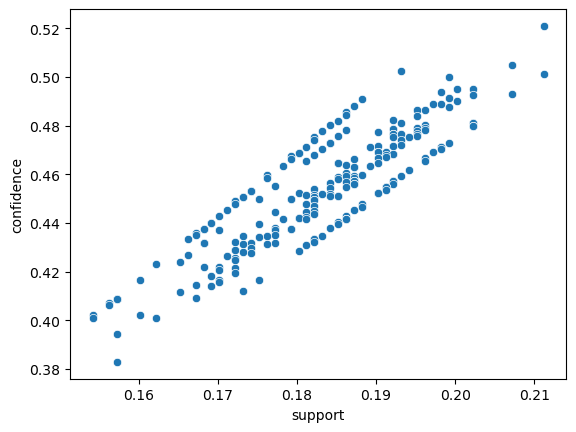

In [20]:
sns.scatterplot(x = "support", y = "confidence", data = rules1)
plt.show()

In [21]:
from pandas.plotting import parallel_coordinates

In [22]:
def rules_to_coordinates(rules):
    rules['antecedent'] = rules['antecedents'].apply(lambda antecedent:list(antecedent)[0])
    rules['consequent'] = rules['consequents'].apply(lambda consequent:list(consequent)[0])
    rules['rule'] = rules.index
    return rules[['antecedent','consequent','rule']]

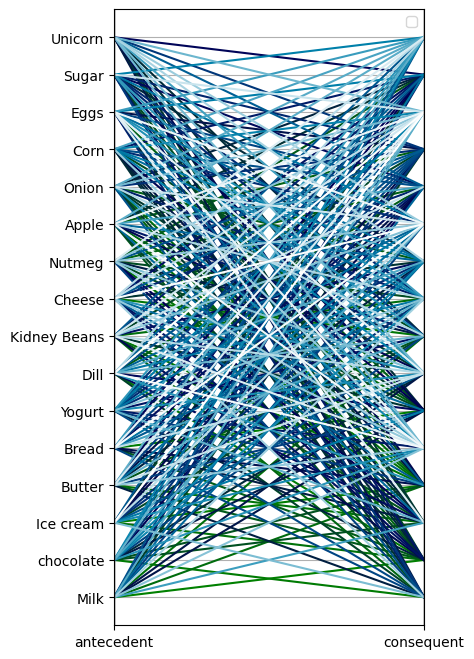

In [23]:
# Convert rules into coordinates suitable for use in a parallel coordinates plot
coords = rules_to_coordinates(rules1)
# Generate parallel coordinates plot
plt.figure(figsize=(4,8))
parallel_coordinates(coords, 'rule',colormap = 'ocean')
plt.legend([])
plt.show()

Confidence versus Support graph for Rule2

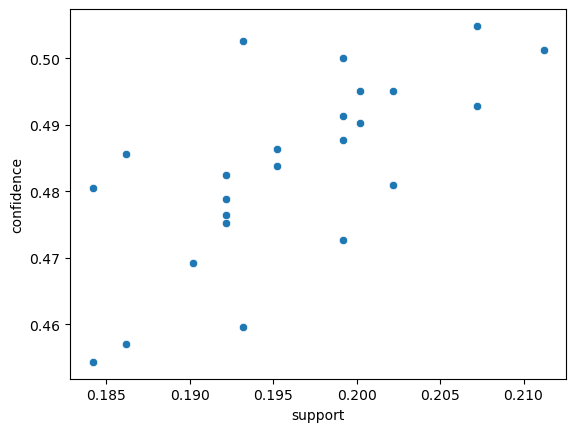

In [24]:
sns.scatterplot(x = "support", y = "confidence", data = rules2)
plt.show()

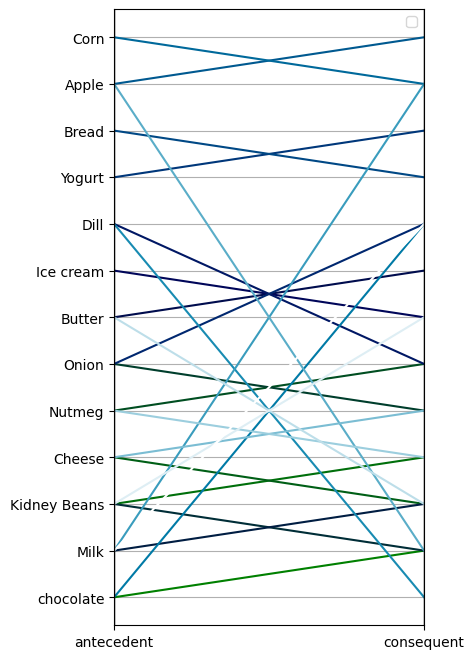

In [25]:
# Convert rules into coordinates suitable for use in a parallel coordinates plot
coords = rules_to_coordinates(rules2)
# Generate parallel coordinates plot
plt.figure(figsize=(4,8))
parallel_coordinates(coords, 'rule',colormap = 'ocean')
plt.legend([])
plt.show()

Confidence versus Support graph for Rule3

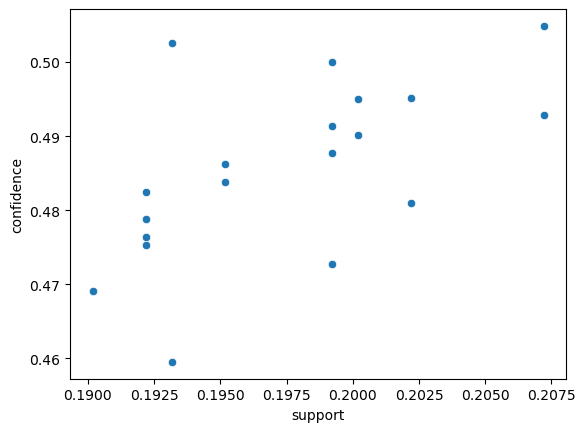

In [26]:
sns.scatterplot(x = "support", y = "confidence", data = rules3)
plt.show()

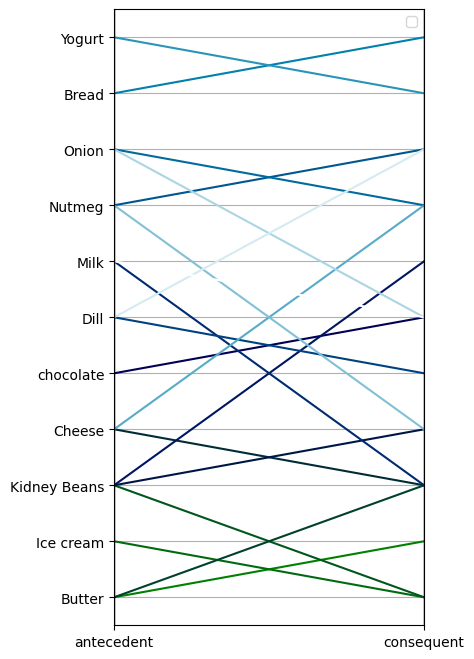

In [27]:
# Convert rules into coordinates suitable for use in a parallel coordinates plot
coords = rules_to_coordinates(rules3)
# Generate parallel coordinates plot
plt.figure(figsize=(4,8))
parallel_coordinates(coords, 'rule',colormap = 'ocean')
plt.legend([])
plt.show()

In [12]:
%timeit apriori(df, min_support=0.15) 

3.34 ms ± 107 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [13]:
df

,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
0,False,True,False,False,True,True,False,True,False,False,False,False,True,False,True,True
1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,True,False,True,False,False,True,False,True,False,True,False,False,False,False,True,True
3,False,False,True,True,False,True,False,False,False,True,True,True,False,False,False,False
4,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,True
995,True,False,False,False,True,False,False,False,True,True,True,False,False,False,True,False
996,True,False,False,False,True,True,False,False,False,False,False,False,True,False,False,True
997,False,False,True,True,True,False,True,True,True,False,True,False,True,False,True,True


In [14]:
from mlxtend.frequent_patterns import fpgrowth
fpgrowth(df,min_support=0.15)

,support,itemsets
0,0.421421,(15)
1,0.420420,(14)
2,0.410410,(7)
3,0.409409,(12)
4,0.407407,(4)
...,...,...
131,0.169169,"(3, 6)"
132,0.182182,"(6, 15)"
133,0.180180,"(4, 6)"
134,0.168168,"(13, 6)"


In [15]:
frequent_itemsets=fpgrowth(df,min_support=0.2,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.421421,(chocolate)
1,0.420420,(Yogurt)
2,0.410410,(Ice cream)
3,0.409409,(Sugar)
4,0.407407,(Corn)
5,0.398398,(Dill)
6,0.384384,(Bread)
7,0.405405,(Milk)
8,0.420420,(Butter)
9,0.383383,(Apple)


In [16]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.30)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Ice cream),(chocolate),0.410410,0.421421,0.202202,0.492683,1.169098,0.029246,1.140467
1,(chocolate),(Ice cream),0.421421,0.410410,0.202202,0.479810,1.169098,0.029246,1.133412
2,(Ice cream),(Butter),0.410410,0.420420,0.207207,0.504878,1.200889,0.034662,1.170579
3,(Butter),(Ice cream),0.420420,0.410410,0.207207,0.492857,1.200889,0.034662,1.162571
4,(Milk),(chocolate),0.405405,0.421421,0.211211,0.520988,1.236263,0.040365,1.207857
5,(chocolate),(Milk),0.421421,0.405405,0.211211,0.501188,1.236263,0.040365,1.192021
6,(Butter),(chocolate),0.420420,0.421421,0.202202,0.480952,1.141262,0.025028,1.114693
7,(chocolate),(Butter),0.421421,0.420420,0.202202,0.479810,1.141262,0.025028,1.114169
8,(Kidney Beans),(Cheese),0.408408,0.404404,0.200200,0.490196,1.212143,0.035038,1.168284
9,(Cheese),(Kidney Beans),0.404404,0.408408,0.200200,0.495050,1.212143,0.035038,1.171583


In [17]:
%timeit fpgrowth(df, min_support=0.15)

35.9 ms ± 628 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
